<a href="https://colab.research.google.com/github/blackcrowX/Data_Analysis_Projects/blob/main/Python/Visualisation_Medical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
<h1>Visualisation - Medical Data</h1>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/FreeCodeCamp_logo.svg/2560px-FreeCodeCamp_logo.svg.png"/>
</div>

## Table of Contents
* Introduction
* Setup
  * Import Libraries
  * Import Data
* Data Visualisation
  * Add 'Overweight' Column
  * Normalise Data
  * Draw Categorical Plot
  * Data Cleaning for Heat Map
  * Draw Heat Map

<h1 align="center">Introduction</h1>

In this project, we will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations and published by <a href="https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer">freeCodeCamp</a>.

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. We will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

|Feature|Variable Type|Variable|Value Type|
|---:|------:|:-----------------|---------:|
|Age|Objective Feature|age|int (days)|
|Height|Objective Feature|height|int (cm)|
|Weight|Objective Feature|weight|float (kg)|
|Gender|Objective Feature|gender|categorical code|
|Systolic blood pressure|Examination Feature|ap_hi|int|
|Diastolic blood pressure|Examination Feature|ap_lo|int|
|Cholesterol|Examination Feature|cholesterol|1: normal, 2: above normal, 3: well above normal|
|Glucose|Examination Feature|gluc|1: normal, 2: above normal, 3: well above normal|
|Smoking|Subjective Feature|smoke|binary|
|Alcohol intake|Subjective Feature|alco|binary|
|Physical activity|Subjective Feature|active|binary|
|Presence or absence of cardiovascular disease|Target Variable|cardio|binary|

<h1 align="center">Setup</h1>

## Step 1: Import Libraries

Import and configure libraries required for data analysis.

In [ ]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

## Step 2: Import Dataset

Use Pandas to import the data from `medical_examination.csv`.

In [ ]:
url = "https://raw.githubusercontent.com/blackcrowX/Data-Analysis-Projects/main/Datasets/medical_examination.csv"
df = pd.read_csv(url)

<h1 align="center">Data Visualisation</h1>

## Step 3: Add 'Overweight' Column

Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
df['overweight'] = df["weight"] / ((df["height"]/100) ** 2)
df.loc[df["overweight"] > 25, "overweight"] = 1
df.loc[df["overweight"] != 1, "overweight"] = 0

## Step 4: Normalise Data

Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1

df.loc[df["gluc"] == 1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1

## Step 5: Draw Categorical Plot

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.

In [ ]:
df_cat = df.melt(value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat = df.melt(id_vars=["cardio"], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = pd.DataFrame(data=df_cat.value_counts(), columns=["total"]).sort_index().reset_index()

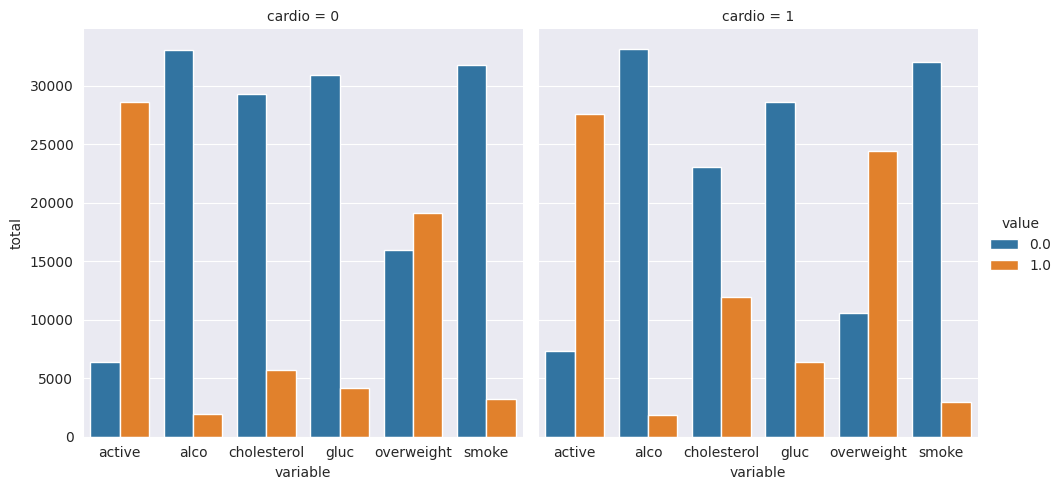

In [ ]:
ax = sns.catplot(x="variable", y="total", hue="value", col="cardio",data=df_cat, kind="bar")

plt.savefig('catplot.png')

## Step 6: Data Cleaning for Heat Map

Clean the data. Filter out the following patient segments that represent incorrect data:
- Diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
- Height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
- Height is more than the 97.5th percentile
- Weight is less than the 2.5th percentile
- Weight is more than the 97.5th percentile

In [ ]:
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi'])&
                 (df['height'] >= df['height'].quantile(0.025))&
                 (df['height'] <= df['height'].quantile(0.975))&
                 (df['weight'] >= df['weight'].quantile(0.025))&
                 (df['weight'] <= df['weight'].quantile(0.975))]

## Step 7: Draw Heat Map
Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

In [ ]:
corr = df_heat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

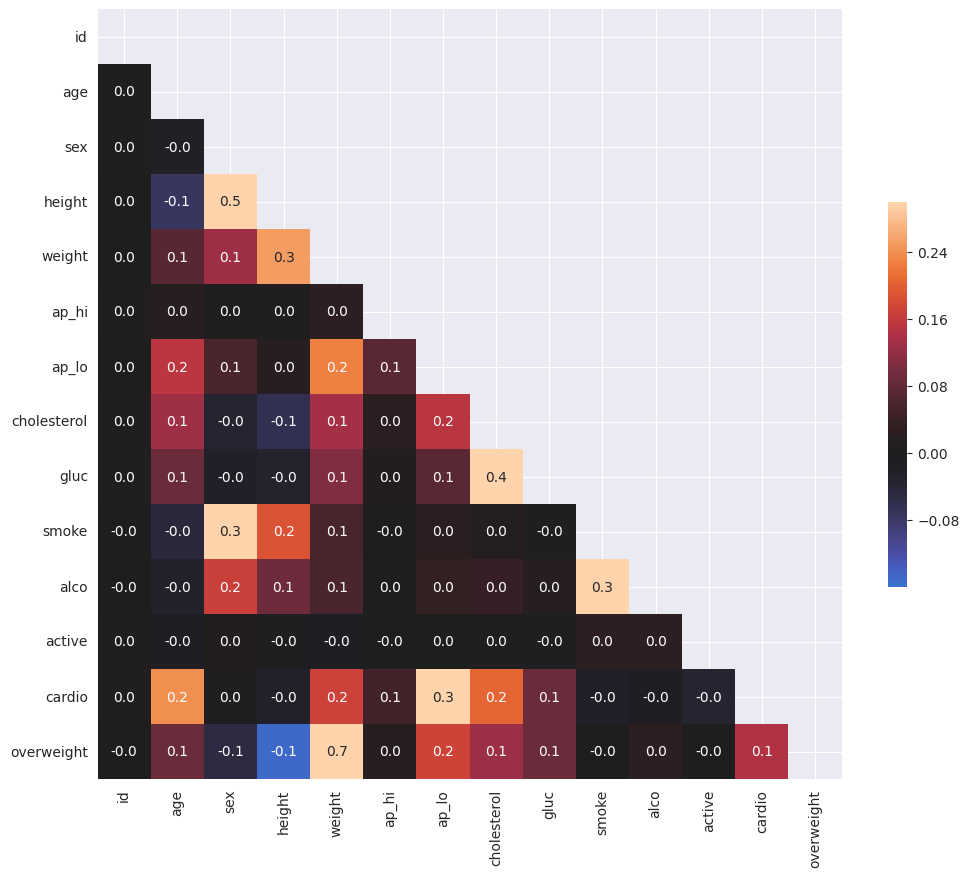

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, 
            mask=mask, 
            vmin=-0.16, 
            vmax=0.3, 
            center=0, 
            annot=True, 
            fmt=".1f", 
            cbar_kws={"shrink": 0.5, 'ticks': [-0.08, 0.00, 0.08, 0.16, 0.24]})

plt.savefig('heatmap.png')